<h2>Introduction</h2>
<p>This notebook is dedicated to the segmentation of e-commerce customers using clustering techniques. The goal is to identify distinct groups of customers based on their purchasing behavior, which can inform targeted marketing strategies and personalize the customer experience.</p>


In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

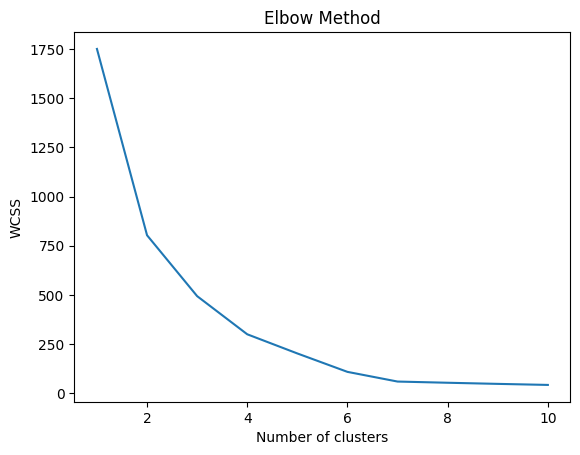

In [3]:

# Load the dataset for segmentation
file_path = 'E-commerce Customer Behavior - Sheet1.csv'
data = pd.read_csv(file_path)

# For clustering, we may not need all the fields, especially categorical fields that would require additional processing.
# We'll focus on numerical fields that have the most direct impact on purchasing behavior.
# Let's select 'Total Spend' and 'Items Purchased' for this example.
df_for_clustering = data[['Total Spend', 'Items Purchased', 'Average Rating', 'Age', 'Days Since Last Purchase']]

# Standardize the data - very important for KMeans
scaler = StandardScaler()
df_for_clustering_scaled = scaler.fit_transform(df_for_clustering)

# Use the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_for_clustering_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # WCSS stands for Within-Cluster-Sum-of-Squares
plt.show()

# Now we can run the KMeans algorithm with the chosen number of clusters.
# Based on the Elbow
